## **Time Series Prediction**

In [0]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

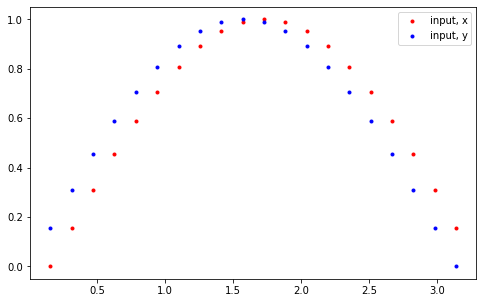

In [4]:
plt.figure(figsize=(8,5))

# how many time steps are in one batch of data
seq_length = 20

time_steps = np.linspace(0, np.pi, seq_length+1)
data = np.sin(time_steps)

x = data[:-1]
y = data[1:]

plt.plot(time_steps[1:], x, 'r.', label='input, x')
plt.plot(time_steps[1:], y, 'b.', label='input, y')

plt.legend(loc='best')
plt.show()

In [0]:
class RNN(nn.Module):
  
  def __init__(self, input_size, output_size, hidden_dim, n_layers):
    super(RNN, self).__init__()

    self.hidden_dim = hidden_dim

    self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)

    self.fc = nn.Linear(hidden_dim, output_size)


  def forward(self, x, hidden):
    # x(batch_size, seq_length, input_size)
    # hidden(n_layers, batch_size, hidden_dim)
    
    batch_size = x.size(0)

    # get RNN output
    r_out, hidden = self.rnn(x, hidden)
    r_out = r_out.view(-1, self.hidden_dim)

    output = self.fc(r_out)

    return output, hidden

In [11]:

# test that dimensions are as expected
test_rnn = RNN(input_size=1, output_size=1, hidden_dim=10, n_layers=2)

# generate evenly spaced, test data pts
time_steps = np.linspace(0, np.pi, seq_length)
data = np.sin(time_steps)
data.resize((seq_length, 1))

test_input = torch.Tensor(data).unsqueeze(0) # give it a batch_size of 1 as first dimension
print('Input size: ', test_input.size())

# test out rnn sizes
test_out, test_h = test_rnn(test_input, None)
print('Output size: ', test_out.size())
print('Hidden state size: ', test_h.size())

Input size:  torch.Size([1, 20, 1])
Output size:  torch.Size([20, 1])
Hidden state size:  torch.Size([2, 1, 10])


In [12]:
# hyperparameters
input_size=1 
output_size=1
hidden_dim=32
n_layers=1

# instantiate an RNN
rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [0]:
# loss and optimization function

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

**Training a model**

In [0]:
def train(rnn, n_steps, print_every):

  # initialize the hidden state
  hidden = None

  for batch_num, step in enumerate(range(n_steps)):

    # defining training data
    time_steps = np.linspace(step * np.pi, (step+1) * np.pi, seq_length+1)
    data = np.sin(time_steps)
    data.resize((seq_length + 1, 1))

    x = data[:-1]
    y = data[1:]

    x_tensor = torch.Tensor(x).unsqueeze(0)
    y_tensor = torch.Tensor(y)

    # output from rnn
    prediction, hidden = rnn(x_tensor, hidden)

    # representing memory
    hidden = hidden.data

    loss = criterion(prediction, y_tensor)

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

    if batch_num % print_every == 0:        
            print('Loss: ', loss.item())
            plt.plot(time_steps[1:], x, 'r.') # input
            plt.plot(time_steps[1:], prediction.data.numpy().flatten(), 'b.') # predictions
            plt.show()

  return rnn

Loss:  0.26971161365509033


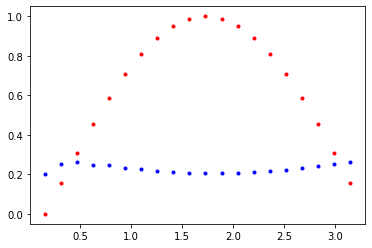

Loss:  0.03073223866522312


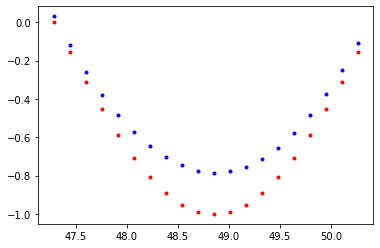

Loss:  0.01135758962482214


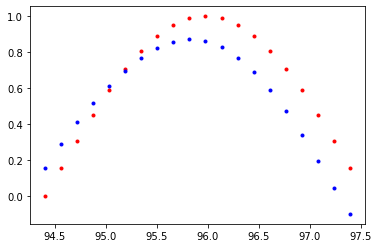

Loss:  0.0016871843254193664


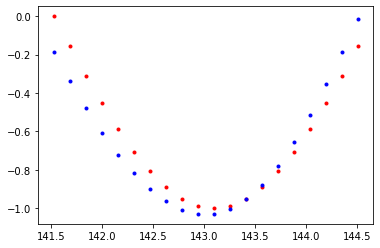

Loss:  0.00018676705076359212


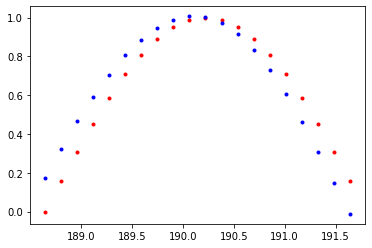

In [19]:
n_steps = 75
print_every = 15

trained_rnn = train(rnn, n_steps, print_every)